In [1]:
from SPCCT_4D import Sample, Timepoint
# Calling the bunny army
s1 = Sample(1)
s2 = Sample(2)
s3 = Sample(3)
s4 = Sample(4)

c:\Users\Chris\OneDrive\2023\BME_M2\STAGE\Thesis\Scripts_and_venv\internship_M2\SPCCT_4D.py:24: SyntaxWarning: invalid escape sequence '\c'
  base_path = f"D:\copyRaw\Rabbit_AGUIX_{rabbit_id}"


Available directories:
0: 2021_01_25.4531.300.2024_03_17.AGUIX_Rabbit_26201_h00000
1: 2021_01_25.4531.400.2024_03_15.AGUIX_Rabbit_26201_f00001
2: 2021_01_25.4531.500.2024_03_15.AGUIX_Rabbit_26201_f00002
3: 2021_01_25.4531.600.2024_03_15.AGUIX_Rabbit_26201_f00003
4: 2021_01_25.4531.700.2024_03_15.AGUIX_Rabbit_26201_f00004
Conventional file 1 total DICOM files found: 480
Spectral\k_gadolinium file 1 total DICOM files found: 480
Conventional file 2 total DICOM files found: 480
Spectral\k_gadolinium file 2 total DICOM files found: 480
Conventional file 3 total DICOM files found: 480
Spectral\k_gadolinium file 3 total DICOM files found: 480
Conventional file 4 total DICOM files found: 480
Spectral\k_gadolinium file 4 total DICOM files found: 480
Conventional file 5 total DICOM files found: 480
Spectral\k_gadolinium file 5 total DICOM files found: 480
Available directories:
0: 2021_01_25.4533.300.2024_03_17.AGUIX_Rabbit_26608_e00000
1: 2021_01_25.4533.400.2024_03_15.AGUIX_Rabbit_26608_c00001

(512, 512, 480)


(-0.5, 479.5, 511.5, -0.5)

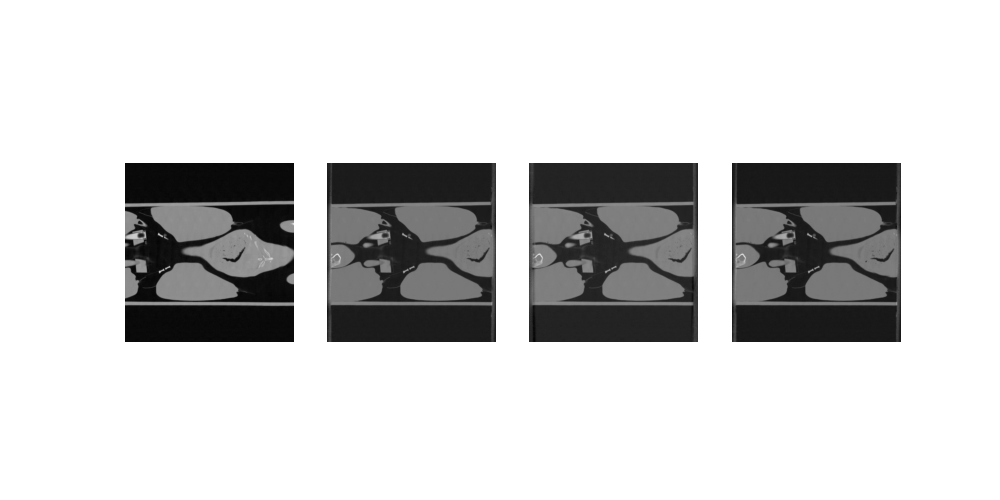

In [7]:
print(s1.acquisition[0].conventional.shape)

import matplotlib.pyplot as plt
n = 200

plt.figure(figsize=(10, 5))
plt.subplot(1,4,1)
plt.imshow(s1.acquisition[0].conventional[n,:,:], cmap = 'gray')
plt.axis('off')

plt.subplot(1,4,2)
plt.imshow(s1.acquisition[1].conventional[n,:,:], cmap = 'gray')
plt.axis('off')

plt.subplot(1,4,3)
plt.imshow(s1.acquisition[2].conventional[n,:,:], cmap = 'gray')
plt.axis('off')

plt.subplot(1,4,4)
plt.imshow(s1.acquisition[3].conventional[n,:,:], cmap = 'gray')
plt.axis('off')

In [38]:
class Viewer:
    """
    A Viewer class for interactive visualization in Jupyter notebooks using %matplotlib widget.
    
    Usage requires:
    - %matplotlib widget to be called in the notebook.
    - matplotlib and ipympl to be installed.
    """
    def __init__(self, sample):
        self.sample = sample
        self.init_time_point = 0
        self.init_slice_index = 50
        self.image_type = 'kedge'  # Toggle between 'kedge' and 'conventional'

        self.fig, self.ax = plt.subplots(figsize=(10, 10))
        plt.subplots_adjust(left=0.25, bottom=0.3)
        self.ax.axis('off')  # Hide the axis for a cleaner look

        # Display the initial image
        self.image_display = self.ax.imshow(self.get_image(self.init_time_point, self.init_slice_index), cmap='gray')

        # Time point slider
        ax_time = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor='lightgray')
        self.time_slider = Slider(ax_time, 'Time Point', 0, len(self.sample.acquisition)-1, valinit=self.init_time_point, valstep=1)

        # Slice index slider
        ax_slice = plt.axes([0.05, 0.25, 0.0225, 0.63], facecolor='lightgray')
        self.slice_slider = Slider(ax_slice, 'Slice Index', 0, self.get_slice_max(), valinit=self.init_slice_index, valstep=1, orientation='vertical')

        # View switch button
        ax_button = plt.axes([0.4, 0.025, 0.2, 0.075])
        self.button = Button(ax_button, 'Switch View', color='lightblue', hovercolor='0.975')

        # Set up event handlers
        self.time_slider.on_changed(self.update)
        self.slice_slider.on_changed(self.update)
        self.button.on_clicked(self.switch_image_type)

        plt.show()

    def get_image(self, time_point, slice_index):
        """Retrieve the image for the given time point and slice index."""
        return getattr(self.sample.acquisition[time_point], self.image_type)[:, :, slice_index]

    def get_slice_max(self):
        """Get the maximum slice index for the current image type and time point."""
        return getattr(self.sample.acquisition[0], self.image_type).shape[2] - 1

    def update(self, val):
        """Update the displayed image based on slider values."""
        time_point = int(self.time_slider.val)
        slice_index = int(self.slice_slider.val)
        new_image = self.get_image(time_point, slice_index)
        self.image_display.set_data(new_image)
        self.image_display.set_clim(vmin=new_image.min(), vmax=new_image.max())  # Adjust display range dynamically
        self.fig.canvas.draw_idle()

    def switch_image_type(self, event):
        """Switch between 'kedge' and 'conventional' image types."""
        self.image_type = 'conventional' if self.image_type == 'kedge' else 'kedge'
        self.slice_slider.valmax = self.get_slice_max()  # Adjust the max slice index for the new image type
        self.update(None)  # Update the display to reflect the change

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

class Viewer:
    def __init__(self, sample):
        self.sample = sample
        self.init_time_point = 0
        self.init_slice_index = 50
        self.image_type = 'kedge'  # Initial image type

        self.fig, self.ax = plt.subplots(figsize=(6, 6))
        plt.subplots_adjust(left=0.25, bottom=0.3, right=0.75)  # Adjust the right margin to make space for the sliders
        self.ax.axis('off')

        self.image_display = self.ax.imshow(self.get_image(self.init_time_point, self.init_slice_index), cmap='gray')

        # Time and Slice Sliders
        self.time_slider = Slider(plt.axes([0.25, 0.15, 0.65, 0.03], facecolor='lightgray'), 'Time Point', 0, len(self.sample.acquisition)-1, valinit=self.init_time_point, valstep=1)
        self.slice_slider = Slider(plt.axes([0.05, 0.25, 0.0225, 0.63], facecolor='lightgray'), 'Slice Index', 0, self.get_slice_max(), valinit=self.init_slice_index, valstep=1, orientation='vertical')

        # Adjusted Window Level and Width Sliders ranges to accommodate a wider range of values
        self.win_level_slider = Slider(plt.axes([0.8, 0.25, 0.0225, 0.63], facecolor='lightgray'), 'Window Level', -1024, 3072, valinit=40, orientation='vertical')
        self.win_width_slider = Slider(plt.axes([0.85, 0.25, 0.0225, 0.63], facecolor='lightgray'), 'Window Width', 1, 4096, valinit=400, orientation='vertical')

        self.button = Button(plt.axes([0.4, 0.025, 0.2, 0.075]), 'Switch View', color='lightblue', hovercolor='0.975')

        # Connect Event Handlers
        self.time_slider.on_changed(self.update)
        self.slice_slider.on_changed(self.update)
        self.win_level_slider.on_changed(self.update_windowing)
        self.win_width_slider.on_changed(self.update_windowing)
        self.button.on_clicked(self.switch_image_type)

        plt.show()

    def get_image(self, time_point, slice_index):
        return getattr(self.sample.acquisition[time_point], self.image_type)[:, :, slice_index]

    def get_slice_max(self):
        return getattr(self.sample.acquisition[0], self.image_type).shape[2] - 1

    def update(self, val):
        new_image = self.get_image(int(self.time_slider.val), int(self.slice_slider.val))
        # Calculate the window range
        level = self.win_level_slider.val
        width = self.win_width_slider.val
        lower = level - (width / 2)
        upper = level + (width / 2)
    
        if self.image_type == 'conventional':
            windowed_image = self.apply_windowing(new_image)
            # For conventional images, use the window range for display limits
            self.image_display.set_clim(vmin=lower, vmax=upper)
        else:
            # For k-edge images or other types, adjust display based on their specific range if needed
            windowed_image = new_image
            # Here, you might want to set specific limits for k-edge images or use the image's min and max
            # self.image_display.set_clim(vmin=windowed_image.min(), vmax=windowed_image.max())

        self.image_display.set_data(windowed_image)
        self.fig.canvas.draw_idle()

    def update_windowing(self, val):
        if self.image_type == 'conventional':
            self.update(None)

    def apply_windowing(self, image):
        level = self.win_level_slider.val
        width = self.win_width_slider.val
        lower = level - (width / 2)
        upper = level + (width / 2)

        # Clip the image to the window
        windowed_image = np.clip(image, lower, upper)

        # Normalize the windowed image to the 0-1 range for float display
        normalized_image = (windowed_image - lower) / (upper - lower)
        normalized_image = np.clip(normalized_image, 0, 1)  # Ensure the normalized values are within [0, 1]

        return windowed_image

    def switch_image_type(self, event):
        self.image_type = 'conventional' if self.image_type == 'kedge' else 'kedge'
        self.slice_slider.valmax = self.get_slice_max()
        self.update(None)
        # Optionally, show/hide window sliders based on image type
        self.win_level_slider.ax.set_visible(self.image_type == 'conventional')
        self.win_width_slider.ax.set_visible(self.image_type == 'conventional')
        plt.draw()  # Redraw to update slider visibility


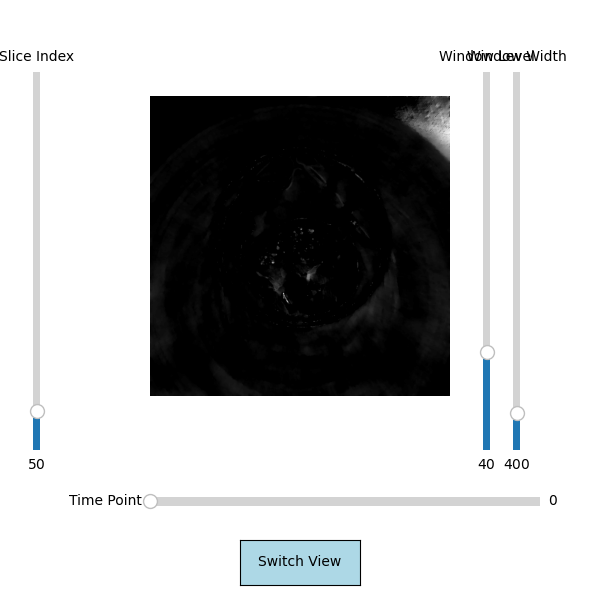

In [80]:
Viewer(s3)